# Final 
# YourUserID: xxxxxxxx
## General 
The instruction for the final exam for IS2002B is included in this Jupyter Notebook. 
Some basic rules: 
- You are allowed to use any document and source on your computer and look up documents on the internet. 
- You or not allowed to share documents, or communicate in any other way with people inside or outside the class room during the final.
- You are only allowed to use the packages listed under "preliminaries" - the use of other  regression or machine learning toolboxes (such as statsmodels or scilearn) is not permitted. 
- All the code you are using from previous Assignments or Labs need to be included in the notebook. 
- All questions also require some written answer. The answer to these questions should be given in full English sentences. 
- All Figures should be appropriately labeled and should have a figure caption. 
- The Final needs to be submitted on OWL. Please check before you leave the room that you final has been correctly recieved. 
## Preliminaries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

## Data set
This data set (mammals.csv) includes data for 60 species of mammals distributed over 13 orders. The data were used for analyzing the relationship between constitutional and ecological factors and sleeping in mammals. Two qualitatively different sleep variables (dreaming and non dreaming) were recorded. Constitutional variables such as life span, body weight, brain weight and gestation time were evaluated. Ecological variables such as severity of predation, safety of sleeping place and overall danger were inferred from field observations in the literature.

The data frame contains 60 observations on the following 12 variables.
- Species: Species of mammals
- Order: The scientific order (i.e. in taxonomie) of the mammal species 
- BodyWt: Total body weight of the mammal (in kg)
- BrainWt: Brain weight of the mammal (in g)
- NonDreaming: Number of hours of non dreaming sleep
- Dreaming: Number of hours of dreaming sleep
- TotalSleep: Total number of hours of sleep
- LifeSpan: Average Life span (in years)
- Gestation: Gestation time (in days)
- Predation: An index of how likely the mammal is to be preyed upon. 1 = least likely to be preyed upon. 5 = most likely to be preyed upon.
- Exposure: An index of the how exposed the mammal is during sleep. 1 = least exposed (e.g., sleeps in a well-protected den). 5 = most exposed.
- Danger: An index of how much danger the mammal faces from other animals. This index is based upon Predation and Exposure. 1 = least danger from other animals. 5 = most danger from other animals.

In [3]:
# Read DF 
df = pd.read_csv("mammals.csv")
df.head(20)

,Species,Order,BodyWt,BrainWt,NonDreaming,Dreaming,TotalSleep,LifeSpan,Gestation,Predation,Exposure,Danger
0,Africanelephant,Proboscidea,6654.000,5712.0,2.5,0.8,3.3,38.6,645.0,3,5,3
1,Africangiantpouchedrat,Rodent,1.000,6.6,6.3,2.0,8.3,4.5,42.0,3,1,3
2,ArcticFox,Carnivore,3.385,44.5,10.0,2.5,12.5,14.0,60.0,1,1,1
3,Asianelephant,Proboscidea,2547.000,4603.0,2.1,1.8,3.9,69.0,624.0,3,5,4
4,Baboon,Primate,10.550,179.5,9.1,0.7,9.8,27.0,180.0,4,4,4
5,Bigbrownbat,Bat,0.023,0.3,15.8,3.9,19.7,19.0,35.0,1,1,1
6,Braziliantapir,Ungulate,160.000,169.0,5.2,1.0,6.2,30.4,392.0,4,5,4
7,Cat,Carnivore,3.300,25.6,10.9,3.6,14.5,28.0,63.0,1,2,1
8,Chimpanzee,Primate,52.160,440.0,8.3,1.4,9.7,50.0,230.0,1,1,1
9,Chinchilla,Rodent,0.425,6.4,11.0,1.5,12.5,7.0,112.0,5,4,4


## Task 1: Relationship between body and brain weight
### Question 1 (5pts) 
Make a histogram of BrainWt, using 30 equally-spaced bin. Don't forget axis labels and figure caption. Written answer: How do you describe the distribution in terms of symmetry and skew? 

<AxesSubplot:xlabel='BrainWt', ylabel='Count'>

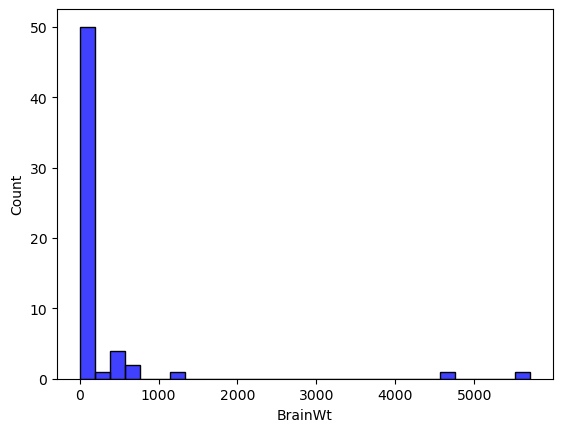

In [7]:
sns.histplot(data = df, x = "BrainWt", color = "b", bins = 30)

The distribution is very asymmetric, unimodal, and right skewed. 

### Question 2 (5pts)
Because of the distribution of body and brain weight, researchers in evolutionary biology usually work with the logarithm of body and brain weight. Generate two new columns in your data frame called 'logBodyWt' and 'logBrainWt' and assign to them the natural logarithm of body and brain weight respectively. Plot a histogram of the logBrainWt, again using 30 bins. How do you characterize the distribution of logBrainWt in terms of symmetry and skew?   

<AxesSubplot:xlabel='logBrainWt', ylabel='Count'>

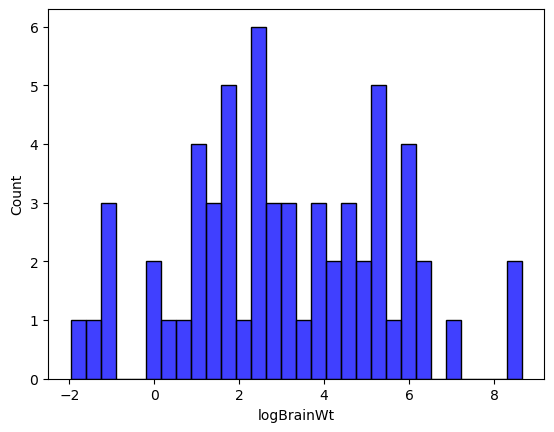

In [10]:
logBodyWt = np.log(df["BodyWt"])
df['logBodyWt']  = logBodyWt

logBrainWt = np.log(df["BrainWt"])
df['logBrainWt']  = logBrainWt

sns.histplot(data = df, x = "logBrainWt", color = "b", bins = 30)

The distribition is definitly more symmetric but I would not say that is is. It is also bimodal. No skew - more normal.

### Question 3 (7pts)
Run a linear regression analysis with logBrainWt as the response variable and logBodyWt as the explanatory variable:

$logBrainWt = b_0 + b_1 logBodyWt$. 

What percentage of the variance of logBrainWt can be explained by logBodyWt? Is the relationship between log Body Weight and log Brain Weight well described by a linear relationship? Do you think the model could be improved? 

varaince 0.9185886998027369


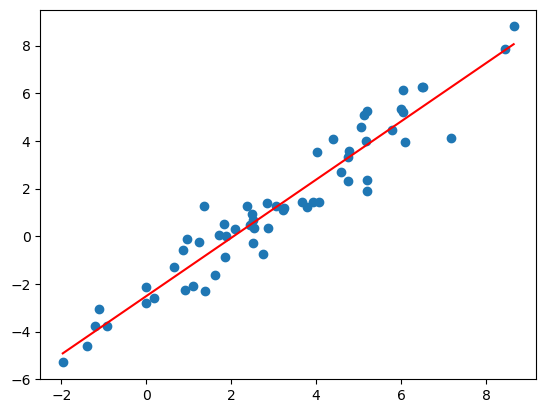

In [26]:
def simpleRegPredict(b, x):
    yPredicted = b[0] + b[1]*x
    return yPredicted

def plotPrediction(b,x,y,fcn = simpleRegPredict):
    plt.scatter(x, y) 
    xPredict = np.linspace(min(x), max(x), num = len(x))
    plt.plot(xPredict, fcn(b, xPredict), color = 'red')

def simpleRegLossRSS(b, x, y):
    yPredict = simpleRegPredict(b, x)

    # calculate the residuals (difference between the real and predicted y values)
    res = y - yPredict
    rss = res**2
    loss = np.sum(rss)

    # calculate the derivatives with respect to each parameter (regression coefficient)
    db0 = np.sum(-2*(res))
    db1 = np.sum(-2*x*res)
    
    #dloss/db
    deriv = [db0, db1]
    
    return loss, deriv

def simpleRegFit(x, y, fcn = simpleRegLossRSS):
    b0 = [0,0]
    
    result = so.minimize(fcn, b0, args=(x, y), jac=True)
    
    b = result.x
    plotPrediction(b, x, y, fcn = simpleRegPredict)
    
    TSS = sum((y - np.mean(y))**2)
    
    loss, d = fcn(b,x,y)
    
    R2 = 1 - (loss/TSS)

    return R2, b

R2, b = simpleRegFit(df["logBrainWt"], df["logBodyWt"], simpleRegLossRSS)
print("varaince", R2)

What percentage of the variance of logBrainWt can be explained by logBodyWt? Is the relationship between log Body Weight and log Brain Weight well described by a linear relationship? Do you think the model could be improved? 

91.8% of the varience of logBrainWt can be explained due to logBodyWt (r2 value). The relationship is descibed will by a linear model. I think the model could only be improved by taking another sample and looking for repeated results. 

### Question 4 (6pts)
Given the regression equation: 

$logBrainWt = b_0 + b_1 logBodyWt$ 

solve the equation for 

$BrainWt = ?$ 

Hint: Use the basic relationships for natural logarithm (log) and the exponential (exp(a) = $e^a$) 

$exp(a+b) = exp(a)*exp(b)$

$log(a^b) = b*log(a)$

$exp(log(a)) = a $

In your result, how do $b_0$ and $b_1$ change the relationship?
When would the relationship between BrainWeight and Body Weight be proportional (i.e. linear)? 

logBrainWt = -2.5128875388040166 + 1.2222412102028812 * logBodyWt
BrainWt = 0.08103391252311037 + 1.2222412102028812 * BodyWt


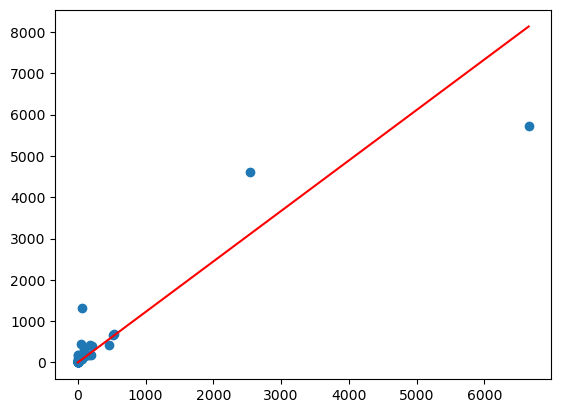

In [32]:
print("logBrainWt", "=", b[0], "+", b[1], "* logBodyWt")

print("BrainWt =", np.exp(b[0]), "+",  b[1], "* BodyWt")

plotPrediction(b = [np.exp(b[0]), b[1]], x = df["BrainWt"], y = df["BodyWt"] ,fcn = simpleRegPredict)

The intercept would change but that's about it. The relationship wuld no longer be linear, rather exponential

### Question 5  (7pts)
Which species have larger brain sizes than expected from their body size? Calculate the residuals from the regression analysis from question 3 and find the species that have a residual larger than log(3). ((logBrainWt - predicted(logBrainWt) > log(3)). Report the species names and their residuals. What does a residual bigger than log(3) mean in terms the difference between actual weight and predicted brain weight?  

In [52]:
yPredict = simpleRegPredict(b, df["logBrainWt"])

for i in range(len(df)):
    res = df["logBodyWt"].iloc[i] - yPredict[i]
    if res > np.log(3):
        print(df.Species[i], res)

Braziliantapir 1.3180877404920608
Cow 1.2635774537266151
Giantarmadillo 1.2361552480442466
Kangaroo 1.1482848783170865
Pig 1.4233370448684042
Tenrec 1.2396615582131527
Wateropossum 2.1022088779371826


a log bigger than 3 means that it is 3 times likely to have a larger actual than predicted

## Task 2: Building a predictive model for Dreaming sleep
### Question 1 (5pts)
What is the maximal number of hours any species amoung the listed ones spends in dreaming sleep? What is the name of the species with the most hours of dreaming sleep? 



### Question 2 (5pts)
Using leave-one-out crossvalidation, determine the crossvalidated $R^2$ value for a linear model that predicts hours of dreaming sleep from

- logBodyWt
- logBrainWt 
- Exposure rating 
- Danger rating 
- Predation rating

### Question 3 (8pts)
Use stepwise linear regression (backwards) to determine the best predictive model (using leave-one-out-crossvalidation) to explain the number of hours of dreaming sleep from these 5 variables (logBodyWt, logBrainWt, Exposure, Danger, Predation). Show all the intermediate steps and show explicitly which term you drop. Report the explanatory variables included in the best model 


### Question 4 (7pts)
Fit the a model that uses logBodyWt,logBrainWt and Danger as explanatory variables and Dreaming as response variable to the entire data set and report the beta-values for each of the regressors. Which regressors predict a larger amount of dreaming sleep and which ones a lesser amount? 

### Question 5 (5pts)
What measurement scale does the variable "Predation" have? 
Based on the measurement scale, is it appropriate to report the

- Counts in each category (1-5)? 
- Median of predation rating? 
- Mean of predation rating? 
- Standard deviation of predation rating?

 Give a yes/no answer for each of the four. If you answer no, jutsify your answer. 

## Task 3: Testing two competing models of mamillarian sleep
### Question 1 (5pts)
The number of hours spent sleeping differs dramatically across different mamillarian species. Why is that? You have the scientific hypothesis that the amount of sleep can be simply explained by the physical brain size - with mammals with smaller brains having to sleep more. Specifically your idea is that the hours of TotalSleep are negatively and linearly related to logBrainWt. To support your hypothesis, run a linear regression analysis and report the fitted R2 value as a measure of fit. Also provide the scatterplot with the fitted regression line. Don't forget axis labels.   

### Question 2 (7pts)
A reviewer of your paper thinks that the relationship bewteen logBrainWt and amount of sleep only comes about by the particular sample of 60 mammals that you are used (amoung the 5416 possible species you could have sampled). 
In response, conduct a boostrap analysis, resampling 1000 times from your sample amd redo your regression analysis from Question 1. Generate a histogram of the slope that indicates the relationship between TotalSleep and logBrainWt. Report the 95% confidence interval. 

What do you conclude? Do the results argue against the reviewer's comment? To make your argument hold, do you need to argue that you sampled your 60species at random from the 5416 known species? Or is random sampling not necessary for the argument here? Justify you answer. 

### Question 3 (5pts)
A competing scientist proposed the idea that the amount of total Sleep has nothing to do with the overall brain weight, but rather is just evolutionary different between different orders of mammals. 
To check this idea on your sample, make a boxplot with TotalSleep  as y-variable and Order as x-variable. Which order sleeps most and which one sleeps least? 

### Question 4 (7pts)
To compare this competing model with yours, generate dummy-coded variables for the different orders in your sample. Use "other" as your reference group. Then run a multiple regression analysis, using all dummy-coded variables as regressors. Report the R2-value, and compare it to the R2 value of the model you fitted in Task3, Question 1. From the result, can you conclude which one is the better model? Justify your answer.

### Question 5 (5pts)
You now want to show that logBrainWt still has a influence on the amount of sleep, even after *accounting* for the order of the mammal. To do this, run a regression analysis with TotalSleep as dependent, and logBrainWt and the dummy-coded variables as a explanatory variable. Report R2 value of the model. Is it bigger than the R2 value in Question 4? What can you conclude from this result?  

### Question 6 (6pts)
To test the idea that brain size influence how much mammals sleep, even after accounting for the order, conduct a bootstrap on the model in Question 5. Show a histogram of the slope parameter for logBrainWt, and report the 95% confidence interval. What do you conclude about the idea you set out to test?     

### Question 7 (5pts)
Using the the same bootstrap sample, test the directed hypothesis that mammals with larger brains sleep less, even after accounting for the order of mammal. What do you conclude? 